# MTH4000 Programming in Python I - Lab 5
Dr Matthew Lewis and Prof. Thomas Prellberg

## Exercises

### Exercise 1: Translating mathematical statements into Python code

For any statements A and B, you will recall that the statement "A implies B" is equivalent to "B or not A".  This can be demonstrated by constructing a truth table:

<table width=40%>
  <tr>
    <th>A</th>
    <th>B</th>
    <th>A implies B</th>
    <th>B or not A</th>
  </tr>
  <tr>
    <td>True</td>
    <td>True</td>
    <td>True</td>
    <td>True</td>
  </tr>
  <tr>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
  </tr>
  <tr>
    <td>False</td>
    <td>True</td>
    <td>True</td>
    <td>True</td>
  </tr>
  <tr>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>True</td>
  </tr>
</table>

Since the Boolean operators `or` and `not` are already defined in Python, we can use them to construct our own `implies` function.  This function accepts two Boolean values, `A` and `B`, and returns the truth value of the statement "A implies B":

In [1]:
def implies(A,B):
    "returns the truth of 'A implies B'"
    return B or not A

#### Exercise 1.a: 

Test that the `implies` function works by evaluating it for all four possible combinations of Boolean values.

In [2]:
implies(False, False)

True

#### Exercise 1.b: 

Write a function `not_implies` that accepts two Boolean values, `A` and `B`, and returns the negation of "A implies B" (i.e.  computes the truth value of the statement "not (A implies B)" ) and evaluate it for all four possible inputs.

In [3]:
def not_implies(A, B):
    "returns the negation of the truth of 'A implies B'"
    return not B and A

In [4]:
not_implies(False, False)

False

We say that an integer $a$ divides an integer $m$, and write $a|m$, if $m=ka$ for some integer $k$. In Python you can write a function `divides(a,m)` which computes the truth of `a divides m` for integers `a` and `m` as follows:

In [5]:
def divides(a,m):
    "returns the truth of 'a divides m'"
    return(m%a==0)

#### Exercise 1.c: 

Test that this Python function works by evaluating it with an instance for which the statement is true, and an instance for which it is false.

In [6]:
divides(7, 3)

False

Last year, you will have encountered the following fact about integer division:

**Theorem:** Let $a,b,m,n\in\mathbb Z$. If $a|m$ and $b|n$ then $ab|mn$. 

According to this theorem

    if 7 divides 14 and 2 divides 4 then 14 divides 56  
is a true statement, and

    if 7 divides 14 and 2 divides 3 then 14 divides 42 
is also a true statement (can you see why?).

#### Exercise 1.d:

Using the `implies` and `divides` functions defined above, write a function `test_theorem(a,b,m,n)` which tests the truth of this Theorem. Evaluate this function by evaluating it for four well-chosen examples.

In [7]:
def test_theorem(a:int, b:int, m:int, n:int) -> bool:
    return implies(divides(a, m) and divides(b, n), divides(a*b, m*n))

In [8]:
test_theorem(7, 14, 2, 3)

True

Now consider the following claim, which is different from the theorem above:

**Claim:** Let $a,b,n\in\mathbb Z$. If $a|n$ and $b|n$ then $ab|n$.

#### Exercise 1.e: 

Write a function `test_theorem2(a,b,n)` which tests the truth of the above claim. Find input values that result in the function producing the output `False`, and hence disprove the statement.

In [9]:
def test_theorem2(a, b, n):
    return implies(divides(a, n) and divides(b, n), divides(a*b, n))

In [10]:
test_theorem2(4, 4, 8)

False

### Exercise 2: Roots of a cubic polynomial

The discriminant of a cubic polynomial $p(x)=ax^3+bx^2+cx+d$ is

$$\Delta=b^2c^2-4ac^3-4b^3d-27a^2d^2+18abcd\;.$$

The discriminant gives us information about the roots of the polynomial $p(x)$:

- if $\Delta>0$, then $p(x)$ has 3 distinct real roots,
- if $\Delta<0$, then $p(x)$ has 2 distinct complex roots and 1 real root,
- if $\Delta=0$, then $p(x)$ has at least 2 (real or complex) roots which are the same.


Represent a cubic polynomial $p(x)=ax^3+bx^2+cx+d$ by the coefficients `a,b,c,d` of numbers. For example, the polynomial $p(x)=x^3-x+1$ is represented as `1,0,-1,1`.

#### Exercise 2.a: 

Write a function called `has_three_real_roots` which takes as input the four coefficients of a cubic polynomial (in decreasing order of degree), and returns `True` if $p(x)$ has 3 real distinct roots and `False` otherwise. 

In [11]:
def has_three_real_roots(a, b=0, c=0, d=0) -> bool:
    discriminant = (b**2)*(c**2) - 4*a*c**3 - 4*d*b**3 - 27*(a**2)*(d**2) + 18*a*b*c*d
    if discriminant > 0:
        return True
    else:
        return False

#### Exercise 2.b.: 

Test this function on the polynomials $x^3$, $x(1-x)^2$, $x^3-x+1$ and $x^3-x$. 

In [12]:
has_three_real_roots(1)

False

In [13]:
has_three_real_roots(a=1, c=-1, d=1)

False

In [14]:
has_three_real_roots(a=1, c=-1)

True

In [15]:
has_three_real_roots(1, -2, 1)

False

### Exercise 3:  Monte Carlo Methods

A Monte Carlo method is an algorithm that approximates the area of a region by taking a large sample of uniformly distributed points over an area that covers that region, and evaluating the proportion of points that fall inside it.

For instance, consider the region bounded by the following condition:

$$x^2+y^2\leq 1\: .$$

This region is shown shaded in white in the plot below.

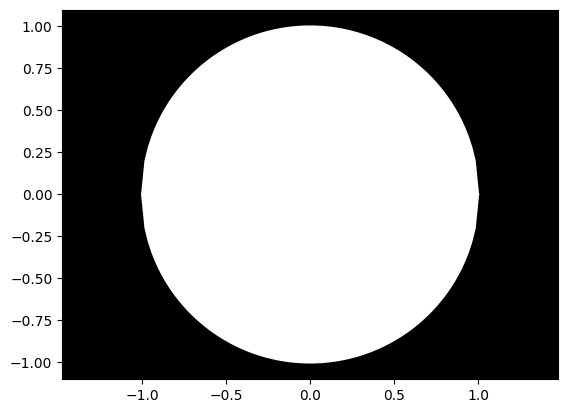

In [16]:
import numpy as np
from matplotlib import pyplot as plt

x=np.linspace(-1,1,100)
y1=(1-x**2)**0.5
y2=-(1-x**2)**0.5

plt.plot(x,y1,color='white')
plt.plot(x,y2,color='white')
ax=plt.gca()
ax.axis('equal')
ax.set_facecolor('black')
ax.fill_between(x,y1,y2,facecolor='white')
plt.show()

It should be clear that this boundary is a circle of radius $1$, and so a Monte Carlo method should return a value approximately equal to $\pi$.

#### Exercise 3.a

The region is covered by the set $[-1,1]\times[-1,1]$, which is a square of area $4$.  Therefore, if we take a large number of uniformly distributed points over the square $[-1,1]\times[-1,1]$, the proportion of the points that lie inside the region should be approximately equal to a quarter of the region's area.

In [36]:
from random import uniform

# Create a list of 10000 points (x,y) that are uniformly distributed in the square [-1,1]*[-1,1]
points=[(uniform(-1,1),uniform(-1,1)) for i in range(10000)]

def inside_circle(x):
    "Accepts a tuple x, and returns 1 if the point given by x lies inside the circle x^2+y^2=1.  Returns 0 otherwise."
    if x[0]**2+x[1]**2<=1:
        return 1
    else:
        return 0

Use the function `inside_circle` to find the proportion of points inside the list `points` that lie inside the circle $x^2+y^2=1$, then use this proportion to find an estimate for $\pi$.

In [37]:
# Count the number of points inside the circle
inside_count = sum(inside_circle(point) for point in points)

# Calculate the proportion of points inside the circle
proportion_inside = inside_count / len(points)

# Estimate pi
pi_estimate = 4 * proportion_inside

print(pi_estimate)

    

3.146


#### Exercise 3.b

Now consider the region bounded by the conditions:

$$\begin{align*}
x^2+y^2 &\leq 9\\
\text{and}\qquad 3x^2+y^2 &\geq 9
\end{align*}$$

This region is shown shaded in white in the plot below.

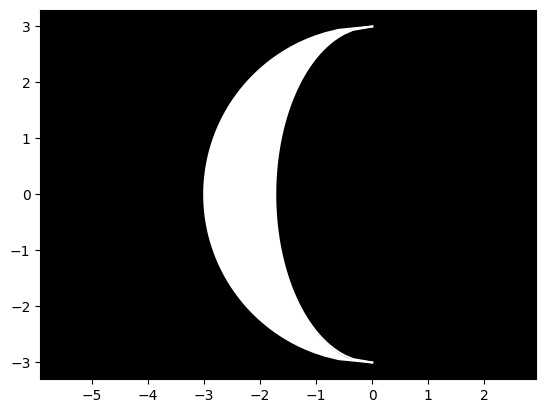

In [19]:
y=np.linspace(-3,3,100)
x1=-(9-y**2)**0.5
x2=-(1/3**0.5)*(9-y**2)**0.5

plt.plot(x1,y,color='white')
plt.plot(x2,y,color='white')
ax=plt.gca()
ax.axis('equal')
ax.set_facecolor('black')
ax.fill_between(x1,y,facecolor='white')
ax.fill_between(x2,y,facecolor='black',edgecolor='black')
plt.show()

In the box below, define a new list `points` of $10000$ uniformly distributed points that cover the rectangle $[-3,0]\times[-3,3]$, and then define a function `inside_crescent` which returns a value of $1$ if a point lies inside this region, and $0$ otherwise.

In [38]:
crescent_points=[(uniform(-3,0),uniform(-3,3)) for i in range(10000)]

def inside_crescent(coors: tuple) -> int:
    x, y = coors
    if (x**2 + y**2 <= 9) and (3*x**2 + y**2 >= 9):
        return 1
    else:
        return 0

Once you have done this, apply `inside_crescent` to the list `points` to find an approximation of the area enclosed by the crescent.

In [39]:
inside_points = sum(inside_crescent(point) for point in crescent_points)
crescent_area_estimate = (inside_points / len(points)) * 18
print(crescent_area_estimate)

5.7924


Note that for any ellipse given by

$$\left(\frac{x}{a}\right)^2+\left(\frac{y}{b}\right)^2=1\:,$$

the enclosed area is equal to $\pi a b$.  We can therefore evaluate the exact area of the above crescent to be:

$$\frac{3\pi}{2}\left(3-\sqrt{3}\right)\;.$$

Does this match the value obtained from your code above?

In [22]:
# It is close to the value

### Exercise 4: Revisiting the Ruler Function

We would like you look again at the [Ruler Function](https://en.wikipedia.org/wiki/Ruler_function), which counts the number of times a positive integer $n$ can be evenly divided by two. A cool way of determining this was to consider the binary representation of integers and getting the number of trailing zeros. Using this idea, we had arrived at
```python
def ruler(n):
    return len(bin(n))-len(bin(n).rstrip('0'))
```

We now explore an alternative approach. If a positive integer is even we can divide it by two and consider the parity of the resulting number. Repeating this, leads to another way of computing the ruler function.

We define recursively $f:\mathbb N\to\mathbb N$ as
$$f:n\mapsto f(n)=\begin{cases}
  0        &\text{if $n$ is odd, and}\\
  1+f(n/2) &\text{if $n$ is even.}
\end{cases}$$

Write a function `ruler_recursive()` that encodes this definition in Python. 

Compare the output of this function with `ruler()` for $n=1,2,\ldots,16$.

What happens if you try to evaluate this function at zero? Why?

In [23]:
def ruler_recursive(n):
    if n % 2 == 0:
        return 1 + ruler_recursive(n/2)
    else:
        return 0

In [24]:
ruler_recursive(4)

2

`ruler_recursive(0)` does not terminate, as it tries to compute `1+ruler_recursive(0)`, leading to an endless recursion.

### Exercise 5: Recursive Functions

In the lecture you encountered the recursive definition of binomial coefficients $\binom nk$.
Of course you know also that these are just the coefficients in the expansion of $(1+x)^n$, i.e.
$$(1+x)^n=\sum_{k=0}^n\binom nkx^k.$$
This approach allows us to define $\binom nk=0$ whenever $k<0$ or $k>n$ and leads to a slightly different
implementation of `binom(n,k)` from the one given in the lecture.

In [25]:
def binom(n,k):
    if k<0 or k>n:
        b=0
    elif n==0:
        b=1
    else:
        b=binom(n-1,k-1)+binom(n-1,k)
    return b

[[binom(n,k) for k in range(n+1)] for n in range(8)]

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1]]


Similarly, the **trinomial coefficients** $\binom nk_2$ are defined by the coefficients in the expansion of $(1+x+x^2)^n$, i.e.

$$(1+x+x^2)^n=\sum_{k=-n}^{n}\binom nk_2x^{n+k}.$$

They satisfy a recursion similar to the one of binomial coefficients,

$$\binom nk_2=\binom{n-1}{k-1}_2+\binom{n-1}k_2+\binom{n-1}{k+1}_2.$$

#### Exercise 4.a: 

Write a Python function `trinom(n,k)` that computes the trinomial coefficients $\binom nk_2$. (Note that you still need to determine the correct conditions at the boundary for the recurrence: for example, what happens if k is too small or too large?)

In [26]:
def trinom(n: int, k: int):
    if n == 0:
        return 1 if k == 0 else 0
    elif k < -n or k > n:
        return 0
    else:
        return trinom(n-1, k-1) + trinom(n-1, k) + trinom(n-1, k+1)

#### Exercise 4.b: 

Using `trinom(n,k)`, compute the first eight rows of the trinomial triangle defined in analogy to Pascal's triangle.

In [27]:
[[trinom(n,k) for k in range(-n, n+1)] for n in range(8)]

[[1],
 [1, 1, 1],
 [1, 2, 3, 2, 1],
 [1, 3, 6, 7, 6, 3, 1],
 [1, 4, 10, 16, 19, 16, 10, 4, 1],
 [1, 5, 15, 30, 45, 51, 45, 30, 15, 5, 1],
 [1, 6, 21, 50, 90, 126, 141, 126, 90, 50, 21, 6, 1],
 [1, 7, 28, 77, 161, 266, 357, 393, 357, 266, 161, 77, 28, 7, 1]]

## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 5.